In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import os
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_china = pd.read_csv('output/merged_china.csv')
df_us = pd.read_csv('output/merged_us.csv')
df_india = pd.read_csv('output/merged_india.csv')

In [3]:
## TO DO
# come up with 2 EDA questions + 1 ML question
# ...

In [4]:
# df_china.info()

# EDA Quetion

# EDA Questions 1

### Does number of population influence the amount of co2?

In [5]:
# df_china.info()

In [6]:
print(len(df_china))
print(len(df_india))
print(len(df_us))

20
20
20


In [37]:
india = df_india[['year','population','co2','country']]
china = df_china[['year','population','co2','country']]
us = df_us[['year','population','co2','country']]

df = pd.concat([india,china,us])
df

year    population        co2        country
0   2001  1.075000e+09    992.560          India
1   2002  1.093317e+09   1023.027          India
2   2003  1.111523e+09   1059.616          India
3   2004  1.129623e+09   1125.471          India
4   2005  1.147610e+09   1185.953          India
5   2006  1.165486e+09   1259.744          India
6   2007  1.183209e+09   1358.152          India
7   2008  1.200670e+09   1462.815          India
8   2009  1.217726e+09   1612.817          India
9   2010  1.234281e+09   1677.888          India
10  2011  1.250288e+09   1780.130          India
11  2012  1.265780e+09   1963.586          India
12  2013  1.280842e+09   2036.937          India
13  2014  1.295601e+09   2185.856          India
14  2015  1.310152e+09   2268.567          India
15  2016  1.324517e+09   2382.223          India
16  2017  1.338677e+09   2433.856          India
17  2018  1.352642e+09   2599.806          India
18  2019  1.366418e+09   2625.968          India
19  2020  1.380004e+09   2441.792          India
0   2001  1.299130e+09   3514.934          China
1   2002  1.307352e+09   3872.595          China
2   2003  1.315304e+09   4545.014          China
3   2004  1.323085e+09   5223.755          China
4   2005  1.330776e+09   5876.555          China
5   2006  1.338409e+09   6488.804          China
6   2007  1.345994e+09   6978.612          China
7   2008  1.353569e+09   7496.832          China
8   2009  1.361169e+09   7886.533          China
9   2010  1.368811e+09   8616.653          China
10  2011  1.376498e+09   9528.556          China
11  2012  1.384206e+09   9775.622          China
12  2013  1.391883e+09   9952.744          China
13  2014  1.399454e+09   9985.583          China
14  2015  1.406848e+09   9848.420          China
15  2016  1.414049e+09   9720.444          China
16  2017  1.421022e+09   9920.459          China
17  2018  1.427648e+09  10289.990          China
18  2019  1.433784e+09  10489.989          China
19  2020  1.439324e+09  10667.887          China
0   2001  2.846080e+08   5904.882  United States
1   2002  2.872793e+08   5946.771  United States
2   2003  2.898156e+08   6011.837  United States
3   2004  2.923547e+08   6114.007  United States
4   2005  2.949935e+08   6134.521  United States
5   2006  2.977590e+08   6051.668  United States
6   2007  3.006084e+08   6131.004  United States
7   2008  3.034860e+08   5914.078  United States
8   2009  3.063076e+08   5478.210  United States
9   2010  3.090115e+08   5675.786  United States
10  2011  3.115841e+08   5540.173  United States
11  2012  3.140439e+08   5338.698  United States
12  2013  3.164005e+08   5474.257  United States
13  2014  3.186734e+08   5522.807  United States
14  2015  3.208783e+08   5371.771  United States
15  2016  3.230160e+08   5248.024  United States
16  2017  3.250848e+08   5207.751  United States
17  2018  3.270963e+08   5375.491  United States
18  2019  3.290649e+08   5255.816  United States
19  2020  3.310026e+08   4712.771  United States

In [8]:
len(df)

60

In [9]:
# df.info()

In [10]:
fig = px.line(df, x="year", y="population", title='population of each country',color='country')
fig.show()

In [11]:
fig = px.line(df, x="year", y="co2", title='population of each country',color='country')
fig.show()

In [12]:
fig = px.scatter(df, x="population", y="co2",color='country',)
fig.show()

# EDA Question 2

In [13]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

### What features correlated with amount of co2

In [14]:
list2 = ['co2','population', 'gdp',
       'Access to electricity (% of population)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Arable land (% of land area)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid fuel consumption (% of total)',
       'CO2 emissions from solid fuel consumption (kt)',
       'CO2 intensity (kg per kg of oil equivalent energy use)',
       'Cereal yield (kg per hectare)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Electricity production from oil sources (% of total)',
       'Electricity production from renewable sources, excluding hydroelectric (% of total)',
       'Electricity production from renewable sources, excluding hydroelectric (kWh)',
       'Energy use (kg of oil equivalent per capita)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Forest area (% of land area)', 'Forest area (sq. km)',
       'Methane emissions (% change from 1990)',
       'Methane emissions (kt of CO2 equivalent)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Nitrous oxide emissions (% change from 1990)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Other greenhouse gas emissions (% change from 1990)',
       'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
       'Population growth (annual %)',
       'Population in urban agglomerations of more than 1 million (% of total population)',
       'Population, total',
       'Renewable electricity output (% of total electricity output)',
       'Renewable energy consumption (% of total final energy consumption)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'Total greenhouse gas emissions (% change from 1990)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Urban population', 'Urban population (% of total population)',
       'Urban population growth (annual %)']

In [15]:
china = df_china[list2]
india = df_india[list2]
us = df_us[list2]

In [16]:
df = pd.concat([china,india,us])

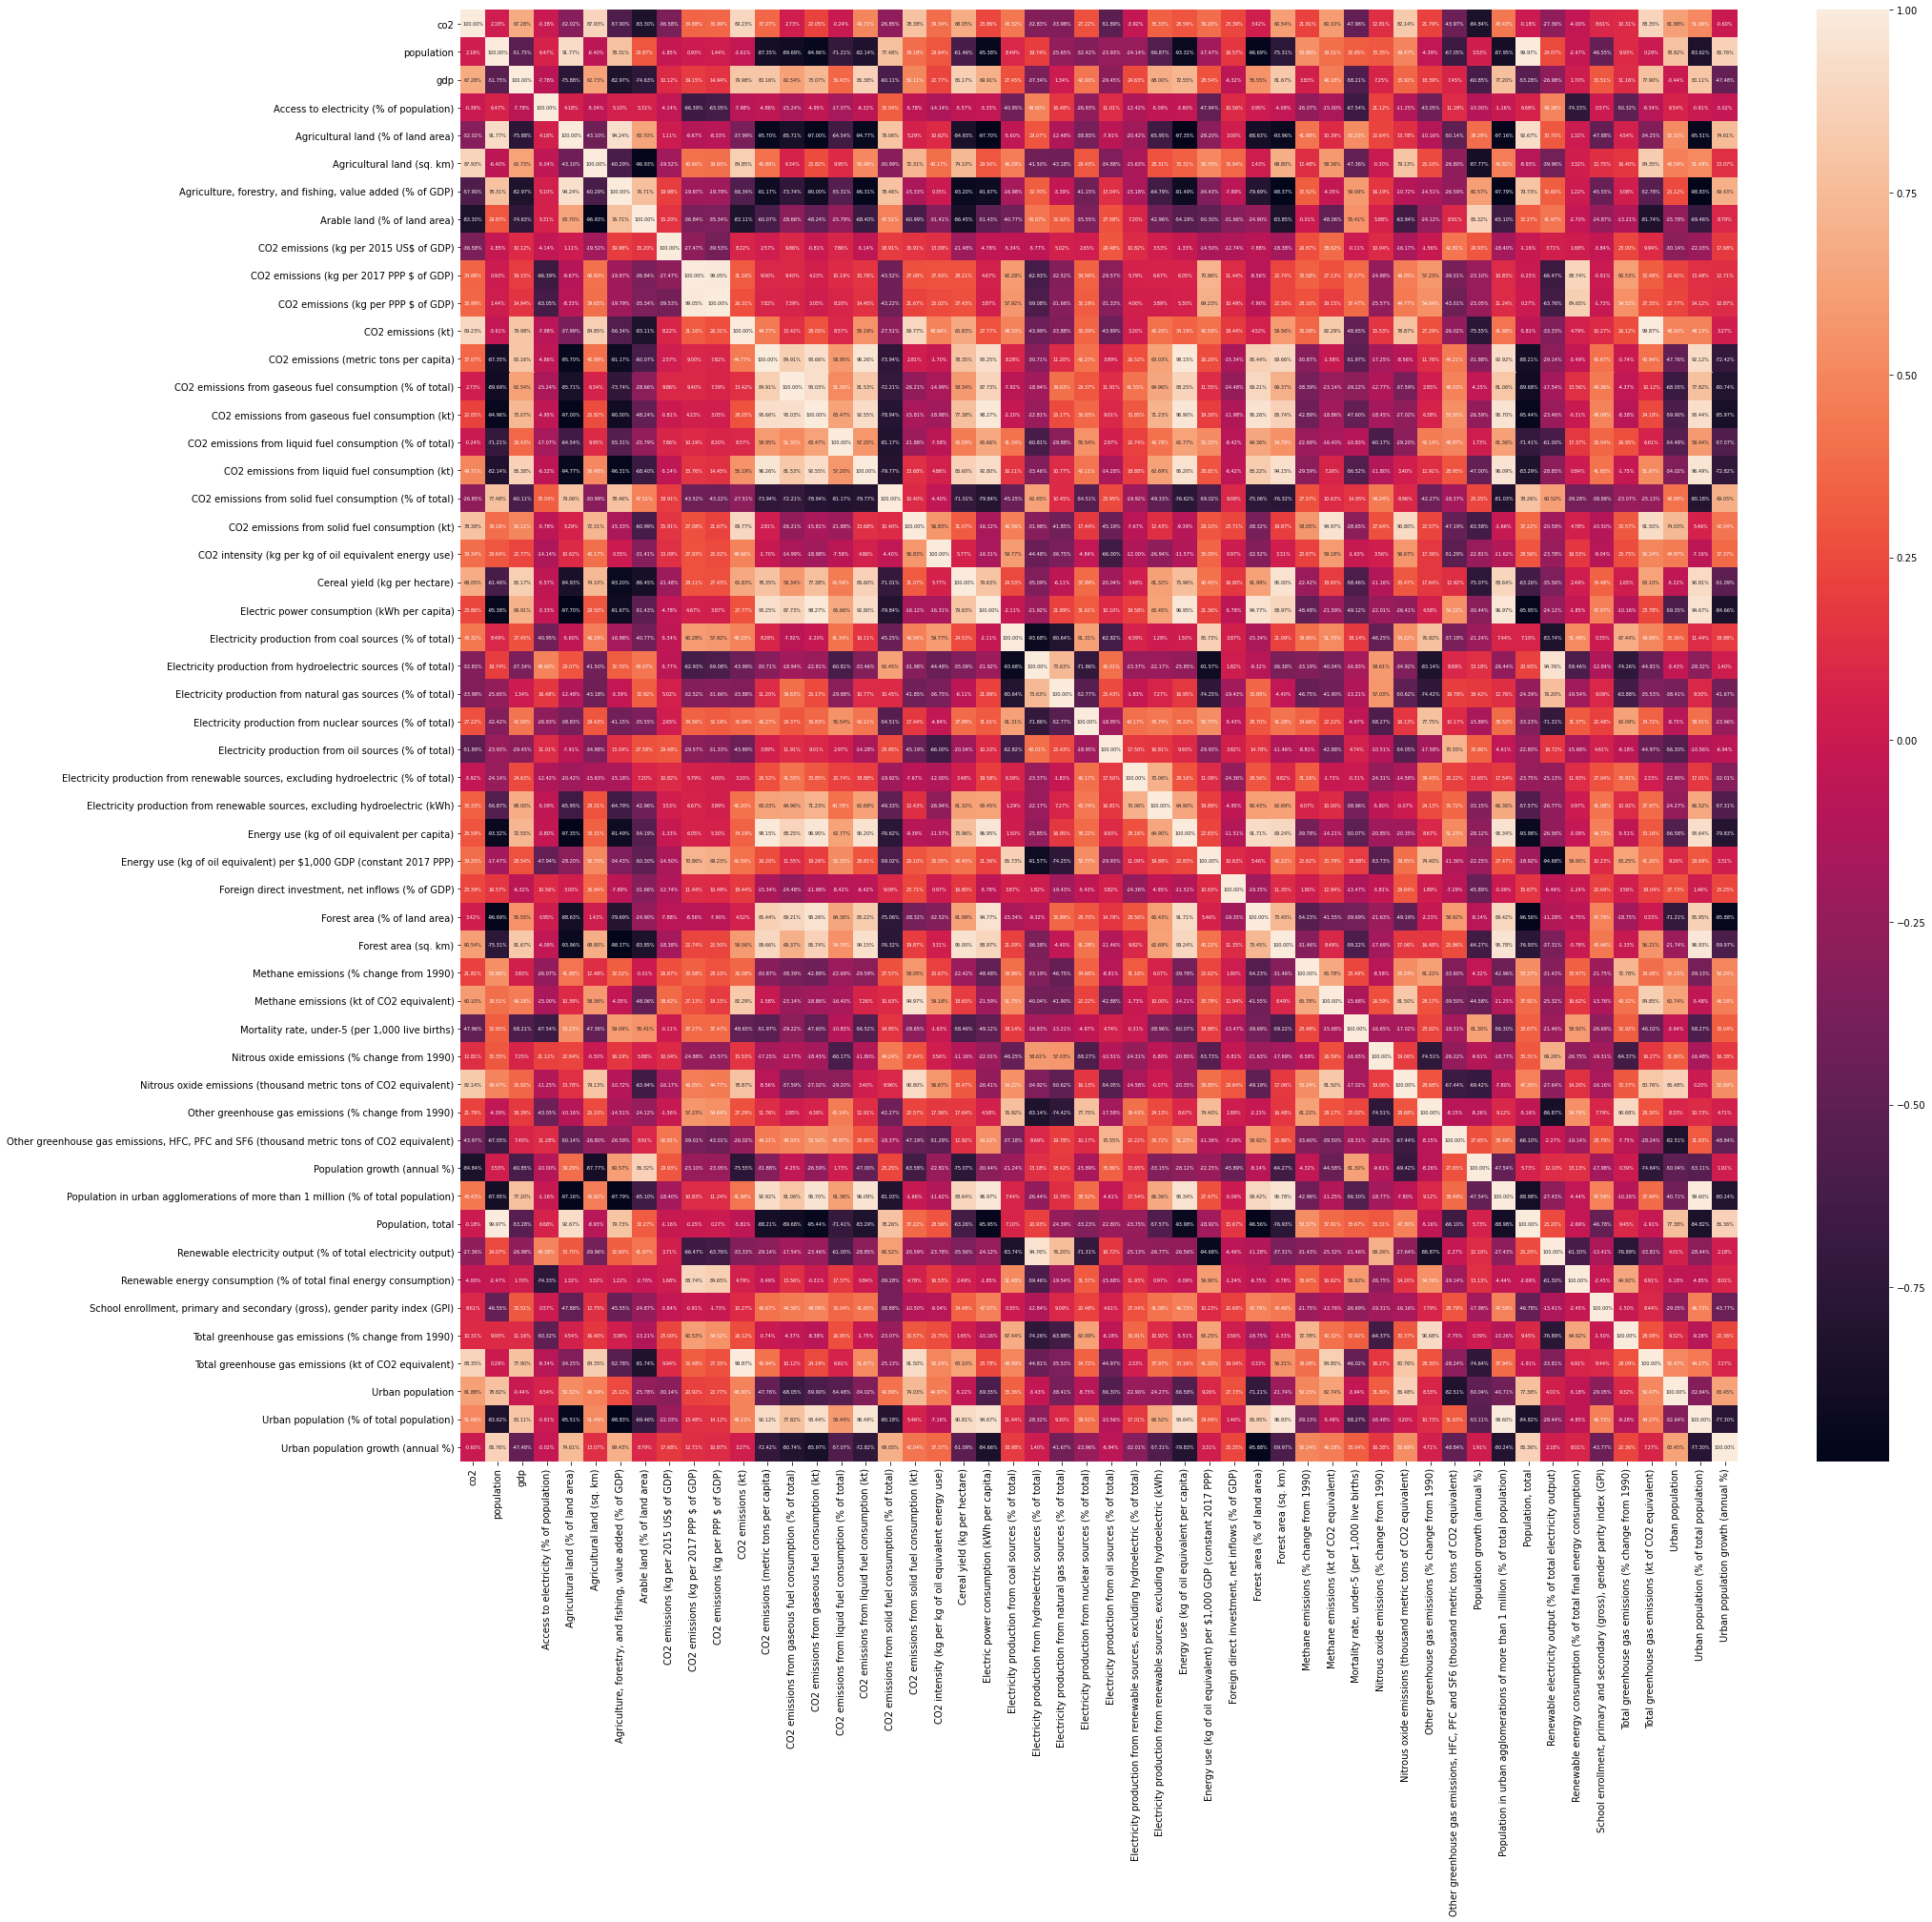

In [17]:
plt.figure(figsize=(30, 28))
hm = sns.heatmap(df.corr(),annot=True,annot_kws={"size": 5}, fmt=".2%")

In [18]:
df = pd.concat([df_china,df_india,df_us])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 19
Data columns (total 82 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   year                                                                                       60 non-null     int64  
 1   co2                                                                                        60 non-null     float64
 2   co2_growth_prct                                                                            60 non-null     float64
 3   co2_growth_abs                                                                             60 non-null     float64
 4   co2_per_capita                                                                             60 non-null     float64
 5   share_global_co2                                    

## Boruta

In [20]:
df['iso_code']

0     CHN
1     CHN
2     CHN
3     CHN
4     CHN
5     CHN
6     CHN
7     CHN
8     CHN
9     CHN
10    CHN
11    CHN
12    CHN
13    CHN
14    CHN
15    CHN
16    CHN
17    CHN
18    CHN
19    CHN
0     IND
1     IND
2     IND
3     IND
4     IND
5     IND
6     IND
7     IND
8     IND
9     IND
10    IND
11    IND
12    IND
13    IND
14    IND
15    IND
16    IND
17    IND
18    IND
19    IND
0     USA
1     USA
2     USA
3     USA
4     USA
5     USA
6     USA
7     USA
8     USA
9     USA
10    USA
11    USA
12    USA
13    USA
14    USA
15    USA
16    USA
17    USA
18    USA
19    USA
Name: iso_code, dtype: object

In [21]:
del df['iso_code']

In [22]:
## one hot encoding

col_list = [col for col in df.columns.tolist() if df[col].dtype.name == "object"]
df_oh = df[col_list]
df = df.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df = pd.concat([df, df_oh], axis=1)
df.head()

year       co2  co2_growth_prct  co2_growth_abs  co2_per_capita  \
0  2001  3514.934             2.20          75.782           2.706   
1  2002  3872.595            10.18         357.662           2.962   
2  2003  4545.014            17.36         672.419           3.456   
3  2004  5223.755            14.93         678.741           3.948   
4  2005  5876.555            12.50         652.801           4.416   

   share_global_co2  cumulative_co2  share_global_cumulative_co2  co2_per_gdp  \
0             13.81       78398.967                         7.32        0.555   
1             14.87       82271.562                         7.50        0.568   
2             16.61       86816.576                         7.72        0.627   
3             18.25       92040.331                         7.99        0.667   
4             19.85       97916.886                         8.28        0.683   

   coal_co2  ...  \
0  2428.857  ...   
1  2778.770  ...   
2  3319.280  ...   
3  3835.288  ...   
4  4424.390  ...   

   Renewable energy consumption (% of total final energy consumption)  \
0                                          28.334999                    
1                                          26.978399                    
2                                          23.841499                    
3                                          20.160801                    
4                                          17.440800                    

   School enrollment, primary and secondary (gross), gender parity index (GPI)  \
0                                           0.964620                             
1                                           0.943115                             
2                                           1.001983                             
3                                           1.022370                             
4                                           1.053162                             

   Total greenhouse gas emissions (% change from 1990)  \
0                                          32.184715     
1                                          40.646591     
2                                          59.966148     
3                                          82.821379     
4                                         100.467167     

   Total greenhouse gas emissions (kt of CO2 equivalent)  Urban population  \
0                                          4791440.0           471767321.0   
1                                          5100860.0           491993700.0   
2                                          5717660.0           512473984.0   
3                                          6467060.0           533257098.0   
4                                          7194480.0           554367818.0   

   Urban population (% of total population)  \
0                                    37.093   
1                                    38.425   
2                                    39.776   
3                                    41.144   
4                                    42.522   

   Urban population growth (annual %)  country_China  country_India  \
0                            4.059566              1              0   
1                            4.198001              1              0   
2                            4.078404              1              0   
3                            3.975372              1              0   
4                            3.882473              1              0   

   country_United States  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 83 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 19
Data columns (total 83 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   year                                                                                       60 non-null     int64  
 1   co2                                                                                        60 non-null     float64
 2   co2_growth_prct                                                                            60 non-null     float64
 3   co2_growth_abs                                                                             60 non-null     float64
 4   co2_per_capita                                                                             60 non-null     float64
 5   share_global_co2                                    

In [24]:
y = df['co2']
X = df.drop('co2', 1)
colnames = X.columns

In [25]:
rf =RandomForestRegressor(n_jobs=-1, max_depth =64)

feat_selector = BorutaPy(rf, n_estimators="auto", random_state = 1)

In [26]:
feat_selector.fit(X.values, y.values.ravel())

BorutaPy(estimator=RandomForestRegressor(max_depth=64, n_estimators=13,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x1CBD121DD40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1CBD121DD40)

In [27]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [28]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


Features  Score
38                                 CO2 emissions (kt)    1.0
16                            share_global_cement_co2    1.0
66  Other greenhouse gas emissions (% change from ...    1.0
65  Nitrous oxide emissions (thousand metric tons ...    1.0
63    Mortality rate, under-5 (per 1,000 live births)    1.0
60                               Forest area (sq. km)    1.0
47                      Cereal yield (kg per hectare)    1.0
76                                   Urban population    1.0
33  Agriculture, forestry, and fishing, value adde...    1.0
31                 Agricultural land (% of land area)    1.0

---------Bottom 10----------


Features  Score
71  Renewable electricity output (% of total elect...   0.20
55  Electricity production from renewable sources,...   0.16
73  School enrollment, primary and secondary (gros...   0.14
36           CO2 emissions (kg per 2017 PPP $ of GDP)   0.12
41   CO2 emissions from gaseous fuel consumption (kt)   0.10
7                                         co2_per_gdp   0.08
26                    share_global_cumulative_gas_co2   0.06
54  Electricity production from renewable sources,...   0.04
40  CO2 emissions from gaseous fuel consumption (%...   0.02
81                              country_United States   0.00

Text(0.5, 1.0, 'Boruta all Features')

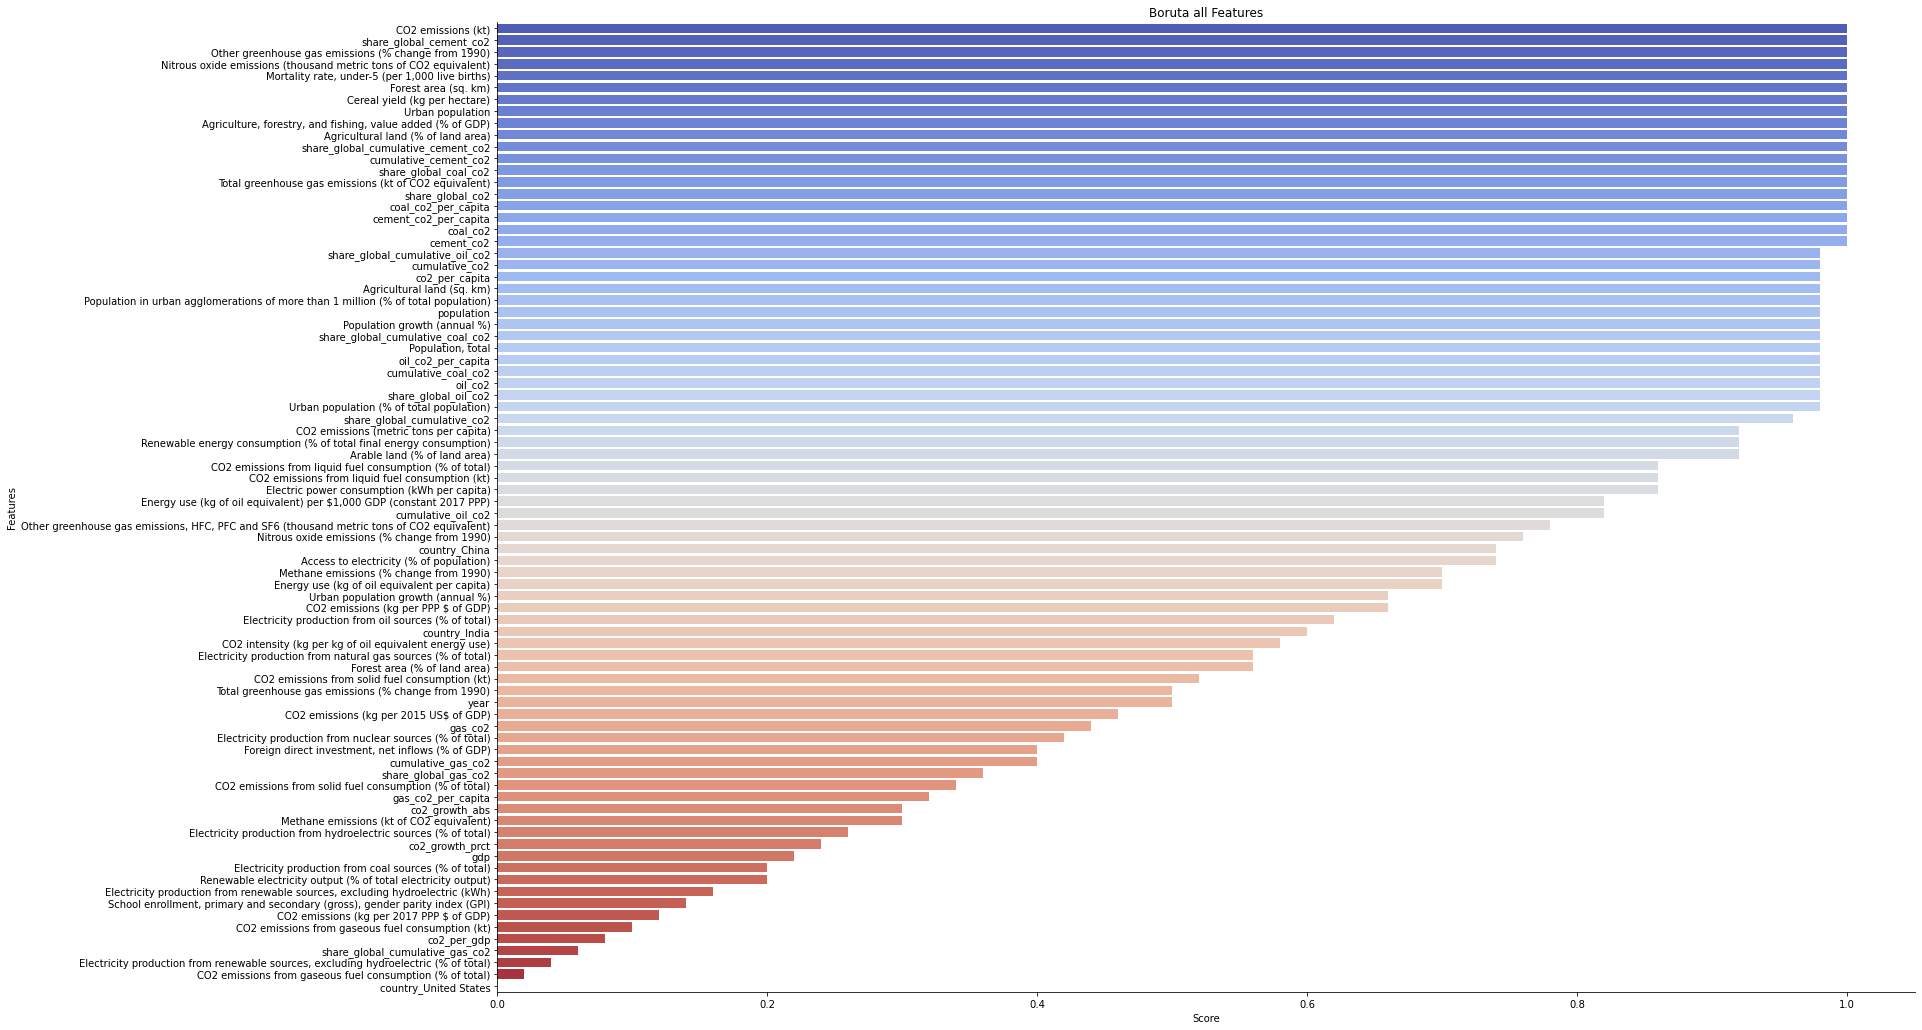

In [29]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta all Features")

## RFECV

In [30]:
rf =RandomForestRegressor(n_jobs=-1, max_depth =64)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3)

In [31]:
rfe.fit(X, y)

RFECV(cv=3, estimator=RandomForestRegressor(max_depth=64, n_jobs=-1))

In [32]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

In [33]:
print('---------Top 10----------')
display(rfe_score.head(10))

print('---------Bottom 10----------')
rfe_score.tail(10)

---------Top 10----------


Features  Score
17                              share_global_coal_co2    1.0
15                                 oil_co2_per_capita    1.0
31                 Agricultural land (% of land area)    1.0
28                                         population    1.0
27                    share_global_cumulative_oil_co2    1.0
47                      Cereal yield (kg per hectare)    1.0
24                 share_global_cumulative_cement_co2    1.0
63    Mortality rate, under-5 (per 1,000 live births)    1.0
66  Other greenhouse gas emissions (% change from ...    1.0
21                                cumulative_coal_co2    1.0

---------Bottom 10----------


Features  Score
71  Renewable electricity output (% of total elect...   0.17
2                                      co2_growth_abs   0.15
7                                         co2_per_gdp   0.13
29                                                gdp   0.11
73  School enrollment, primary and secondary (gros...   0.09
40  CO2 emissions from gaseous fuel consumption (%...   0.07
51  Electricity production from natural gas source...   0.06
41   CO2 emissions from gaseous fuel consumption (kt)   0.04
44  CO2 emissions from solid fuel consumption (% o...   0.02
81                              country_United States   0.00

Text(0.5, 1.0, 'RFECV All Features')

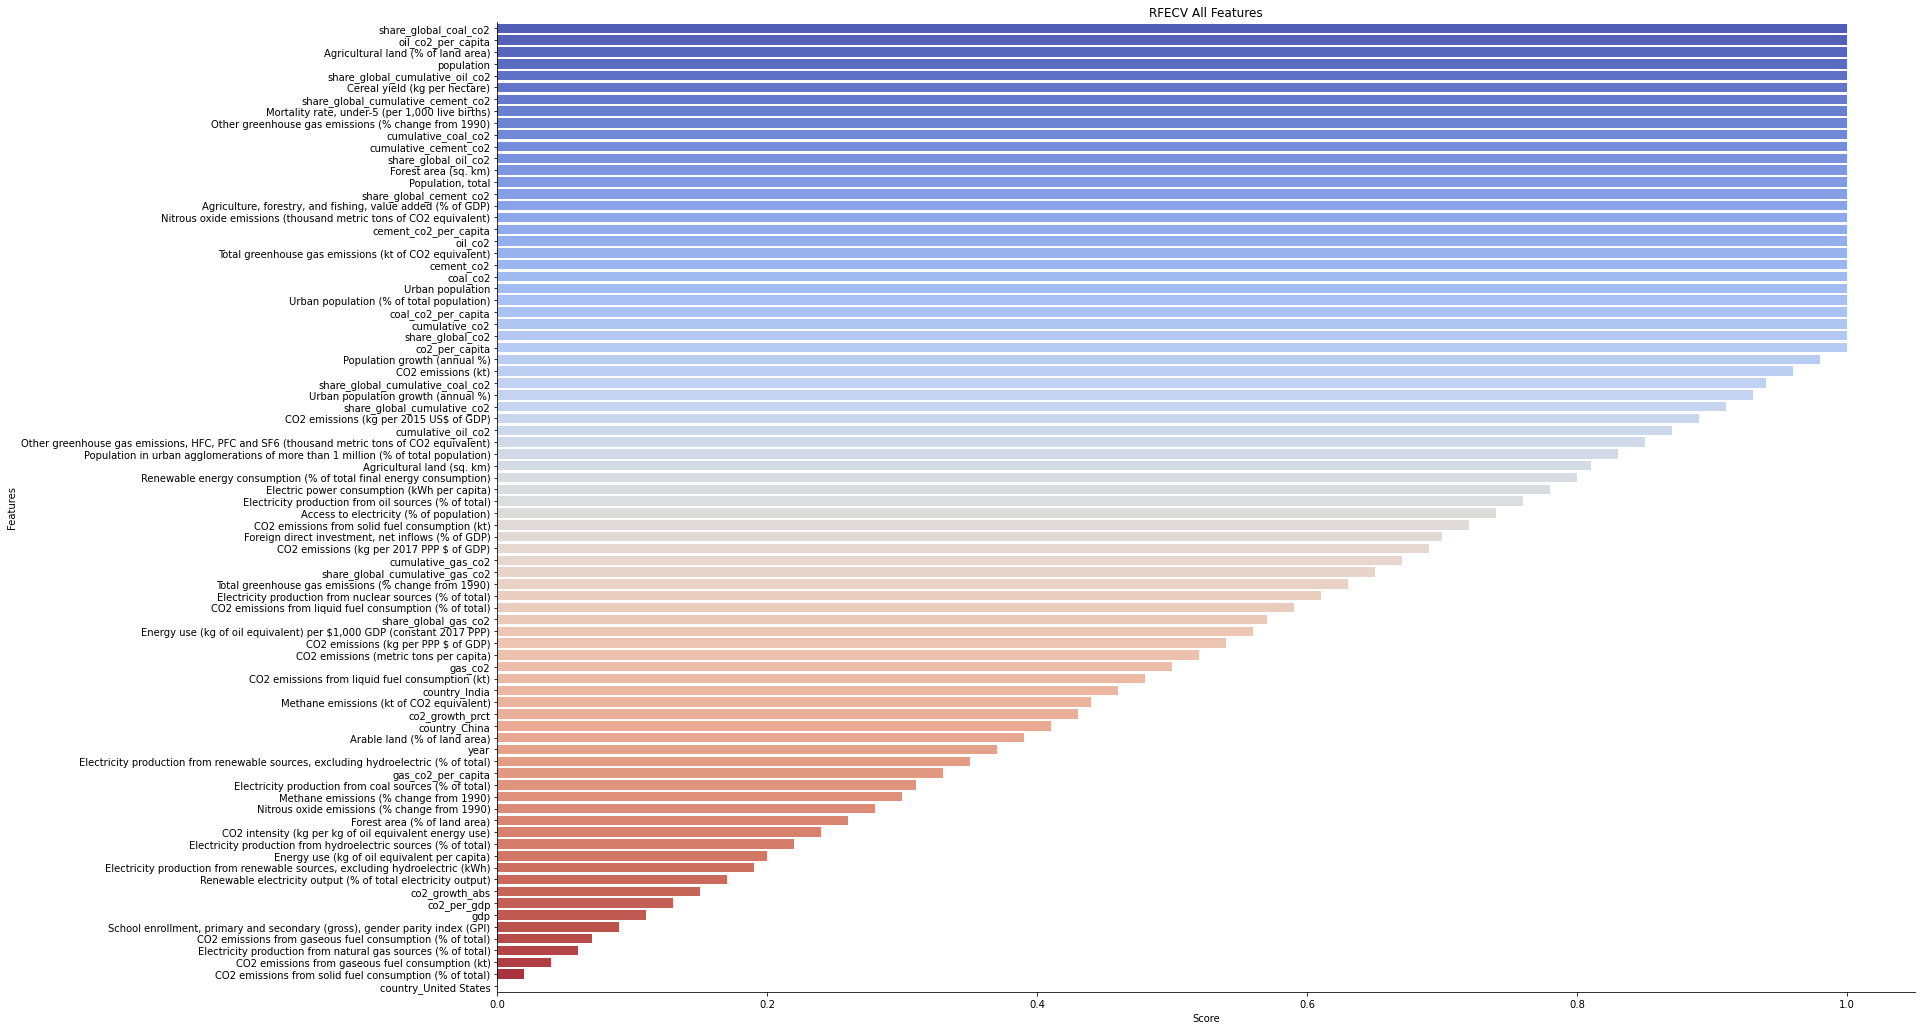

In [34]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[:], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFECV All Features")

In [35]:
rfe_score

Features  Score
17                              share_global_coal_co2   1.00
15                                 oil_co2_per_capita   1.00
31                 Agricultural land (% of land area)   1.00
28                                         population   1.00
27                    share_global_cumulative_oil_co2   1.00
..                                                ...    ...
40  CO2 emissions from gaseous fuel consumption (%...   0.07
51  Electricity production from natural gas source...   0.06
41   CO2 emissions from gaseous fuel consumption (kt)   0.04
44  CO2 emissions from solid fuel consumption (% o...   0.02
81                              country_United States   0.00

[82 rows x 2 columns]

In [36]:
boruta_score

Features  Score
38                                 CO2 emissions (kt)   1.00
16                            share_global_cement_co2   1.00
66  Other greenhouse gas emissions (% change from ...   1.00
65  Nitrous oxide emissions (thousand metric tons ...   1.00
63    Mortality rate, under-5 (per 1,000 live births)   1.00
..                                                ...    ...
7                                         co2_per_gdp   0.08
26                    share_global_cumulative_gas_co2   0.06
54  Electricity production from renewable sources,...   0.04
40  CO2 emissions from gaseous fuel consumption (%...   0.02
81                              country_United States   0.00

[82 rows x 2 columns]

# ML Question

### 1. Clustering co2 according to Country

### 2. Regression predict co2 (not using time series, combine three country, if can, other country also)